In [93]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator
import warnings

In [94]:
#load dataset
df_dispo = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
df_population = pd.read_csv('Population_2000_2018.csv')
df_qualite = pd.read_csv('data_qualite_de_vie.csv')
df_import = pd.read_csv('dataimportation_et_exports_poulets.csv')

df_production = pd.read_csv('prix_de la production.csv')
df_securite = pd.read_csv('securite_alimentaire.csv')
df_pib = pd.read_excel('pib.xlsx')
df_kfc  = pd.read_excel('KFC.xlsx')

## data control


### dispo

In [95]:
#control data set dispo
df_dispo.info()
df_dispo.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [96]:
#check the different values in the column produit
df_dispo.Produit.unique()


array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [97]:
#dispo select for produit= poulet and drop unecessary columns   
df_dispo_2017 = df_dispo[df_dispo['Produit'] == 'Viande de Volailles']
df_dispo_2017 = df_dispo_2017.drop(columns=['Code Domaine', 'Code zone', 'Code Élément', 'Code année', 'Symbole', 'Description du Symbole'])

df_dispo_2017.head(20)

,Domaine,Zone,Élément,Code Produit,Produit,Année,Unité,Valeur
651,Nouveaux Bilans Alimentaire,Afghanistan,Production,2734,Viande de Volailles,2017,Milliers de tonnes,28.00
652,Nouveaux Bilans Alimentaire,Afghanistan,Importations - Quantité,2734,Viande de Volailles,2017,Milliers de tonnes,29.00
653,Nouveaux Bilans Alimentaire,Afghanistan,Variation de stock,2734,Viande de Volailles,2017,Milliers de tonnes,0.00
654,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité intérieure,2734,Viande de Volailles,2017,Milliers de tonnes,57.00
655,Nouveaux Bilans Alimentaire,Afghanistan,Pertes,2734,Viande de Volailles,2017,Milliers de tonnes,2.00
656,Nouveaux Bilans Alimentaire,Afghanistan,Résidus,2734,Viande de Volailles,2017,Milliers de tonnes,0.00
657,Nouveaux Bilans Alimentaire,Afghanistan,Nourriture,2734,Viande de Volailles,2017,Milliers de tonnes,55.00
658,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,kg,1.53
659,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,Kcal/personne/jour,5.00
660,Nouveaux Bilans Alimentaire,Afghanistan,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,g/personne/jour,0.54


In [98]:
df_dispo.Élément.unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [99]:


# Pivot the dataframe so each "Élément" becomes a column
df_dispo_final = df_dispo_2017.pivot(index=[ "Domaine",  "Zone",  "Produit", "Année"], 
                            columns="Élément", 
                            values="Valeur").reset_index()

# Rename columns for clarity
df_dispo_final.columns.name = None  # Remove hierarchical column names


# Display the first few rows
df_dispo_final.head(5)


,Domaine,Zone,Produit,Année,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),...,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Nouveaux Bilans Alimentaire,Afghanistan,Viande de Volailles,2017,NaN,NaN,NaN,5.0,1.53,0.33,...,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Nouveaux Bilans Alimentaire,Afrique du Sud,Viande de Volailles,2017,0.0,NaN,NaN,143.0,35.69,9.25,...,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,-0.0
2,Nouveaux Bilans Alimentaire,Albanie,Viande de Volailles,2017,NaN,NaN,NaN,85.0,16.36,6.45,...,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Nouveaux Bilans Alimentaire,Algérie,Viande de Volailles,2017,0.0,NaN,NaN,22.0,6.38,1.50,...,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Nouveaux Bilans Alimentaire,Allemagne,Viande de Volailles,2017,NaN,NaN,NaN,71.0,19.47,4.16,...,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0


In [100]:
df_dispo_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 21 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Domaine                                                        172 non-null    object 
 1   Zone                                                           172 non-null    object 
 2   Produit                                                        172 non-null    object 
 3   Année                                                          172 non-null    int64  
 4   Alimentation pour touristes                                    78 non-null     float64
 5   Aliments pour animaux                                          1 non-null      float64
 6   Autres utilisations (non alimentaire)                          34 non-null     float64
 7   Disponibilité alimentaire (Kcal/personne/jour)                

In [101]:
#check data in semences and alments pour animaux that are non null
df_dispo_final[df_dispo_final['Aliments pour animaux'] > 0].head(5)
df_dispo_final[df_dispo_final['Semences'] > 0].head(5)

#drop aliments pour animaux and semences columns    
df_dispo_final = df_dispo_final.drop(columns=['Aliments pour animaux', 'Semences', 'Alimentation pour touristes', 'Autres utilisations (non alimentaire)', 'Traitement', 'Résidus', 'Variation de stock', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité alimentaire (Kcal/personne/jour)', 'Domaine', 'Produit'])


In [102]:
df_dispo_final.head(5)


,Zone,Année,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production
0,Afghanistan,2017,57.0,NaN,29.0,55.0,2.0,28.0
1,Afrique du Sud,2017,2118.0,63.0,514.0,2035.0,83.0,1667.0
2,Albanie,2017,47.0,0.0,38.0,47.0,NaN,13.0
3,Algérie,2017,277.0,0.0,2.0,264.0,13.0,275.0
4,Allemagne,2017,1739.0,646.0,842.0,1609.0,NaN,1514.0


In [103]:
# 'Disponibilité intérieure'* 1000000
df_dispo_final['Disponibilité intérieure'] = df_dispo_final['Disponibilité intérieure'] * 1000000
# '"Exportations - Quantité"
df_dispo_final['Exportations - Quantité'] = df_dispo_final['Exportations - Quantité'] * 1000000
# 'Importations - Quantité'
df_dispo_final['Importations - Quantité'] = df_dispo_final['Importations - Quantité'] * 1000000
# 'Nourriture'
df_dispo_final['Nourriture'] = df_dispo_final['Nourriture'] * 1000000
# 'Pertes'
df_dispo_final['Pertes'] = df_dispo_final['Pertes'] * 1000000
# 'production'
df_dispo_final['Production'] = df_dispo_final['Production'] * 1000000



### population

In [104]:
#control data set population
df_population.info()
df_population.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [105]:
# drop unecessary columns
df_population = df_population.drop(columns=['Code Domaine', 'Domaine', 'Code zone', 'Code Élément', 'Code Produit', 'Produit', 'Symbole', 'Description du Symbole', 'Note'])

In [106]:
#valeur * 1000
df_population['Valeur'] = df_population['Valeur'] * 1000

In [107]:
#select 2017
df_population_2017 = df_population[df_population['Année'] == 2017]
#drop Année column
df_population_2017 = df_population_2017.drop(columns=['Année', 'Code année', 'Élément', 'Unité'])

In [108]:
df_population_2017.head(5)

,Zone,Valeur
17,Afghanistan,36296113.0
36,Afrique du Sud,57009756.0
55,Albanie,2884169.0
74,Algérie,41389189.0
93,Allemagne,82658409.0


### Qualite

In [109]:
#control data set qualite
df_qualite.info()

df_qualite.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  140 non-null    int64 
 1   pays        140 non-null    object
 2   Stabilité   140 non-null    int64 
 3   Droits      140 non-null    int64 
 4   Santé       140 non-null    int64 
 5   Sécurité    140 non-null    int64 
 6   climat      140 non-null    int64 
 7   couts       140 non-null    int64 
 8   popularité  140 non-null    int64 
 9   total       140 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 11.1+ KB


,Unnamed: 0,pays,Stabilité,Droits,Santé,Sécurité,climat,couts,popularité,total
0,1,Australie,92,96,90,96,91,28,52,79
1,2,Suisse,92,100,94,100,49,46,54,77
2,3,Hong Kong *,88,80,100,100,66,59,31,76
3,4,Saint-Marin,92,85,100,99,70,53,18,76
4,5,Allemagne,85,93,96,96,39,45,68,75


### import

In [110]:
#control data set import
df_import.info()
df_import.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35964 entries, 0 to 35963
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code Domaine            35964 non-null  object
 1   Domaine                 35964 non-null  object
 2   Code zone (M49)         35964 non-null  int64 
 3   Zone                    35964 non-null  object
 4   Code Élément            35964 non-null  int64 
 5   Élément                 35964 non-null  object
 6   Code Produit (CPC)      35964 non-null  int64 
 7   Produit                 35964 non-null  object
 8   Code année              35964 non-null  int64 
 9   Année                   35964 non-null  int64 
 10  Unité                   35964 non-null  object
 11  Valeur                  35964 non-null  int64 
 12  Symbole                 35964 non-null  object
 13  Description du Symbole  35964 non-null  object
 14  Note                    4563 non-null   object
dtypes:

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,TCL,Cultures et produits animaux,4,Afghanistan,5609,Importations - quantité,2151,Poulets,1961,1961,1000 têtes,0,A,Chiffre officiel,NaN
1,TCL,Cultures et produits animaux,4,Afghanistan,5622,Importations - valeur,2151,Poulets,1961,1961,1000 USD,0,A,Chiffre officiel,NaN
2,TCL,Cultures et produits animaux,4,Afghanistan,5909,Exportations - quantité,2151,Poulets,1961,1961,1000 têtes,0,A,Chiffre officiel,NaN
3,TCL,Cultures et produits animaux,4,Afghanistan,5922,Exportations - valeur,2151,Poulets,1961,1961,1000 USD,0,A,Chiffre officiel,NaN
4,TCL,Cultures et produits animaux,4,Afghanistan,5609,Importations - quantité,2151,Poulets,1962,1962,1000 têtes,0,A,Chiffre officiel,NaN


In [111]:
# select year 2017 and drop unecessary columns
df_import_2017 = df_import[df_import['Année'] == 2017]
df_import_2017 = df_import_2017.drop(columns=['Code Domaine', 'Domaine', 'Code zone (M49)', 'Code Élément', 'Symbole', 'Description du Symbole', 'Note', 'Code Produit (CPC)', 'Produit'])
df_import_2017.head(5)

,Zone,Élément,Code année,Année,Unité,Valeur
220,Afghanistan,Importations - quantité,2017,2017,1000 têtes,18970
221,Afghanistan,Importations - valeur,2017,2017,1000 USD,26227
462,Afrique du Sud,Importations - quantité,2017,2017,1000 têtes,397
463,Afrique du Sud,Importations - valeur,2017,2017,1000 USD,7394
464,Afrique du Sud,Exportations - quantité,2017,2017,1000 têtes,6090


In [112]:
# valeur * 1000
df_import_2017['Valeur'] = df_import_2017['Valeur'] * 1000

In [113]:
# Pivot the dataframe so each "Élément" becomes a column
df_import_final = df_import_2017.pivot(index=[ "Zone"], 
                            columns="Élément", 
                            values="Valeur").reset_index()
# Rename columns for clarity
df_import_final.columns.name = None  # Remove hierarchical column names
# Display the first few rows
df_import_final.head(5)

,Zone,Exportations - quantité,Exportations - valeur,Importations - quantité,Importations - valeur
0,Afghanistan,NaN,NaN,18970000.0,26227000.0
1,Afrique du Sud,6090000.0,7992000.0,397000.0,7394000.0
2,Albanie,NaN,NaN,4572000.0,3266000.0
3,Algérie,NaN,NaN,195000.0,19051000.0
4,Allemagne,328450000.0,654322000.0,185661000.0,193759000.0


### production

In [114]:
#control data set production
df_production.info()
df_production.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            111 non-null    object 
 1   Domaine                 111 non-null    object 
 2   Code zone (M49)         111 non-null    int64  
 3   Zone                    111 non-null    object 
 4   Code Élément            111 non-null    int64  
 5   Élément                 111 non-null    object 
 6   Code Produit (CPC)      111 non-null    object 
 7   Produit                 111 non-null    object 
 8   Code année              111 non-null    int64  
 9   Année                   111 non-null    int64  
 10  Code Mois               111 non-null    int64  
 11  Mois                    111 non-null    object 
 12  Unité                   111 non-null    object 
 13  Valeur                  111 non-null    float64
 14  Symbole                 111 non-null    ob

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Code Mois,Mois,Unité,Valeur,Symbole,Description du Symbole
0,PP,Prix à la Production,710,Afrique du Sud,5532,Prix à la Production (USD/tonne),21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,7021,Valeur annuel,USD,2015.1,A,Chiffre officiel
1,PP,Prix à la Production,8,Albanie,5532,Prix à la Production (USD/tonne),21121b,"Viande poids vif, poulet, fraîche ou réfrigérée",2017,2017,7021,Valeur annuel,USD,2469.7,A,Chiffre officiel
2,PP,Prix à la Production,12,Algérie,5532,Prix à la Production (USD/tonne),21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,7021,Valeur annuel,USD,2180.7,A,Chiffre officiel
3,PP,Prix à la Production,276,Allemagne,5532,Prix à la Production (USD/tonne),21121b,"Viande poids vif, poulet, fraîche ou réfrigérée",2017,2017,7021,Valeur annuel,USD,948.9,A,Chiffre officiel
4,PP,Prix à la Production,276,Allemagne,5532,Prix à la Production (USD/tonne),21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,7021,Valeur annuel,USD,1459.5,A,Chiffre officiel
5,PP,Prix à la Production,32,Argentine,5532,Prix à la Production (USD/tonne),21121b,"Viande poids vif, poulet, fraîche ou réfrigérée",2017,2017,7021,Valeur annuel,USD,915.9,A,Chiffre officiel
6,PP,Prix à la Production,32,Argentine,5532,Prix à la Production (USD/tonne),21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,7021,Valeur annuel,USD,1324.1,A,Chiffre officiel
7,PP,Prix à la Production,51,Arménie,5532,Prix à la Production (USD/tonne),21121b,"Viande poids vif, poulet, fraîche ou réfrigérée",2017,2017,7021,Valeur annuel,USD,841.8,A,Chiffre officiel
8,PP,Prix à la Production,51,Arménie,5532,Prix à la Production (USD/tonne),21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,7021,Valeur annuel,USD,3741.2,A,Chiffre officiel
9,PP,Prix à la Production,40,Autriche,5532,Prix à la Production (USD/tonne),21121b,"Viande poids vif, poulet, fraîche ou réfrigérée",2017,2017,7021,Valeur annuel,USD,1216.7,A,Chiffre officiel


In [115]:
# select year 2017 and drop unecessary columns
df_production_2017 = df_production[df_production['Année'] == 2017]
df_production_2017 = df_production_2017.drop(columns=['Code Domaine', 'Domaine', 'Code zone (M49)', 'Code Élément', 'Symbole', 'Description du Symbole'])


In [116]:
#valuer * 1000
df_production_2017['Valeur'] = df_production_2017['Valeur'] / 1000

In [117]:
# pivot the dataframe so each "Élément" becomes a column
df_production_final = df_production_2017.pivot(index=[ "Zone"], 
                            columns="Produit", 
                            values="Valeur").reset_index()
# Rename columns for clarity
df_production_final.columns.name = None  # Remove hierarchical column names
# Display the first few rows
df_production_final.head(5)

,Zone,"Viande poids vif, poulet, fraîche ou réfrigérée","Viande, poulet, fraîche ou réfrigérée"
0,Afrique du Sud,NaN,2.0151
1,Albanie,2.4697,NaN
2,Algérie,NaN,2.1807
3,Allemagne,0.9489,1.4595
4,Argentine,0.9159,1.3241


In [118]:
#control data set pib
df_pib.info()
df_pib.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8052 entries, 0 to 8051
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            8052 non-null   object 
 1   Domaine                 8052 non-null   object 
 2   Code zone (M49)         8052 non-null   int64  
 3   Zone                    8052 non-null   object 
 4   Code Élément            8052 non-null   int64  
 5   Élément                 8052 non-null   object 
 6   Code Produit            8052 non-null   int64  
 7   Produit                 8052 non-null   object 
 8   Code année              8052 non-null   int64  
 9   Année                   8052 non-null   int64  
 10  Unité                   8052 non-null   object 
 11  Valeur                  8052 non-null   float64
 12  Symbole                 8052 non-null   object 
 13  Description du Symbole  8052 non-null   object 
 14  Note                    0 non-null      

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,1985,1985,Millions d’USD,3321.900002,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,1986,1986,Millions d’USD,3320.599991,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,1987,1987,Millions d’USD,2887.499993,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,1988,1988,Millions d’USD,2664.299991,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,1989,1989,Millions d’USD,3342.200002,X,Ciffre de sources internationales,NaN


In [119]:
# select year 2017 and drop unecessary columns
df_pib_2017 = df_pib[df_pib['Année'] == 2017]   
df_pib_2017 = df_pib_2017.drop(columns=['Code Domaine', 'Domaine', 'Code zone (M49)', 'Code Élément', 'Symbole', 'Description du Symbole', 'Note', 'Élément', 'Code Produit', 'Produit', 'Code année', 'Année'])
df_pib_2017.head(5)

,Zone,Unité,Valeur
32,Afghanistan,Millions d’USD,1.903430e+04
70,Afrique du Sud,Millions d’USD,3.808514e+05
109,Albanie,Millions d’USD,1.301973e+04
148,Algérie,Millions d’USD,1.700970e+05
187,Allemagne,Millions d’USD,3.690849e+06


In [120]:
#differnt values in the column unite
df_pib_2017.Unité.unique()

array(['Millions d’USD'], dtype=object)

In [121]:
#valuer * 1000000
df_pib_2017['Valeur'] = df_pib_2017['Valeur'] * 1000000


In [122]:
#drop unite
df_pib_2017 = df_pib_2017.drop(columns=['Unité'])

### kfc

In [123]:
#control data set kfc
df_kfc.info()
df_kfc.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/region  153 non-null    object 
 1   Outlets         153 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


,Country/region,Outlets
0,Algeria,2.0
1,Angola,9.0
2,Botswana,16.0
3,Egypt,136.0
4,Eswatini,10.0


In [124]:
# rename country/region to Zone
df_kfc = df_kfc.rename(columns={'Country/region': 'Zone'})
df_kfc.head(5)

,Zone,Outlets
0,Algeria,2.0
1,Angola,9.0
2,Botswana,16.0
3,Egypt,136.0
4,Eswatini,10.0


In [125]:
# check Zone values
df_kfc.Zone.unique()



array(['Algeria', 'Angola', 'Botswana', 'Egypt', 'Eswatini', 'Gabon',
       'Ghana', 'Ivory Coast', 'Kenya', 'Lesotho', 'Madagascar', 'Malawi',
       'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Nigeria',
       'Rwanda', 'Senegal', 'South Africa', 'Sudan', 'Tanzania',
       'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Armenia', 'Azerbaijan',
       'Bahrain', 'Bangladesh', 'Brunei', 'China', 'Cambodia', 'Georgia',
       'Hong Kong', 'India', 'Indonesia', 'Iraq', 'Israel', 'Japan',
       'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Macau',
       'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman',
       'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia',
       'Singapore', 'South Korea', 'Sri Lanka', 'Taiwan', 'Tajikistan',
       'Thailand', 'Turkey[104]', 'United Arab Emirates', 'Uzbekistan',
       'Vietnam', 'Yemen', 'Antigua and Barbuda', 'Argentina', 'Aruba',
       'Bahamas', 'Barbados', 'Bolivia', 'Bonaire', 'Brazil',
       'C

In [126]:
#zone values in kfc and df_dispo_final
df_dispo_final.Zone.unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas',
       'Bangladesh', 'Barbade', 'Belgique', 'Belize',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Bulgarie', 'Burkina Faso', 'Bélarus',
       'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili',
       'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chine, continentale', 'Chypre',
       'Colombie', 'Congo', 'Costa Rica', 'Croatie', 'Cuba',
       "Côte d'Ivoire", 'Danemark', 'Djibouti', 'Dominique',
       'El Salvador', 'Espagne', 'Estonie', 'Eswatini', 'Fidji',
       'Finlande', 'France', 'Fédération de Russie', 'Gabon', 'Gambie',
       'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Géorgie', 'Haïti', 'Honduras',
       'Hongri

In [127]:
#translate the values in df_kfc to french 
df_kfc['Zone'] = df_kfc['Zone'].dropna().apply(lambda x: GoogleTranslator(source='en', target='fr').translate(x))




## Merge DF

In [128]:
def rename_columns(df, suffix):
    df.rename(columns={col: f"{col}_{suffix}" for col in df.columns if col != "Zone"}, inplace=True)

rename_columns(df_dispo_final, "dispo")
rename_columns(df_population_2017, "population")
rename_columns(df_qualite, "qualite")
rename_columns(df_import_final, "import")
rename_columns(df_production_final, "production")

rename_columns(df_pib_2017, "pib")
rename_columns(df_kfc, "kfc")



In [129]:
# merge dataframes on "zone"
df_merged = pd.merge(df_dispo_final, df_population_2017, on=['Zone'], how='left')
df_merged = pd.merge(df_merged, df_import_final, on=['Zone'], how='left')
df_merged = pd.merge(df_merged, df_production_final, on=['Zone'], how='left')


df_merged = pd.merge(df_merged, df_pib_2017, on=['Zone'], how='left')
df_merged = pd.merge(df_merged, df_kfc, on=['Zone'], how='left')

df_merged.head(200
               )


,Zone,Année_dispo,Disponibilité intérieure_dispo,Exportations - Quantité_dispo,Importations - Quantité_dispo,Nourriture_dispo,Pertes_dispo,Production_dispo,Valeur_population,Exportations - quantité_import,Exportations - valeur_import,Importations - quantité_import,Importations - valeur_import,"Viande poids vif, poulet, fraîche ou réfrigérée_production","Viande, poulet, fraîche ou réfrigérée_production",Valeur_pib,Outlets_kfc
0,Afghanistan,2017,5.700000e+07,NaN,29000000.0,5.500000e+07,2000000.0,2.800000e+07,36296113.0,NaN,NaN,18970000.0,26227000.0,NaN,NaN,1.903430e+10,NaN
1,Afrique du Sud,2017,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,83000000.0,1.667000e+09,57009756.0,6090000.0,7992000.0,397000.0,7394000.0,NaN,2.0151,3.808514e+11,955.0
2,Albanie,2017,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,NaN,1.300000e+07,2884169.0,NaN,NaN,4572000.0,3266000.0,2.4697,NaN,1.301973e+10,11.0
3,Algérie,2017,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,13000000.0,2.750000e+08,41389189.0,NaN,NaN,195000.0,19051000.0,NaN,2.1807,1.700970e+11,2.0
4,Allemagne,2017,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,NaN,1.514000e+09,82658409.0,328450000.0,654322000.0,185661000.0,193759000.0,0.9489,1.4595,3.690849e+12,216.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,2017,4.120000e+08,9.400000e+07,433000000.0,4.120000e+08,NaN,4.800000e+07,9487203.0,300000.0,1012000.0,1000000.0,2297000.0,NaN,NaN,3.905168e+11,151.0
168,Équateur,2017,3.410000e+08,0.000000e+00,0.0,3.240000e+08,17000000.0,3.400000e+08,16785361.0,NaN,NaN,3045000.0,16405000.0,1.7333,NaN,1.042959e+11,NaN
169,États-Unis d'Amérique,2017,1.826600e+10,3.692000e+09,123000000.0,1.810000e+10,NaN,2.191400e+10,325084756.0,68817000.0,190166000.0,4872000.0,8580000.0,1.2015,NaN,1.961210e+13,NaN
170,Éthiopie,2017,1.400000e+07,NaN,1000000.0,1.400000e+07,1000000.0,1.400000e+07,106399924.0,NaN,NaN,2000.0,91000.0,3.8721,NaN,7.679469e+10,NaN


In [130]:

# check on unique values in the column Zone
df_merged.nunique()



Zone                                                          172
Année_dispo                                                     1
Disponibilité intérieure_dispo                                135
Exportations - Quantité_dispo                                  50
Importations - Quantité_dispo                                  84
Nourriture_dispo                                              130
Pertes_dispo                                                   32
Production_dispo                                              125
Valeur_population                                             172
Exportations - quantité_import                                 88
Exportations - valeur_import                                   92
Importations - quantité_import                                152
Importations - valeur_import                                  157
Viande poids vif, poulet, fraîche ou réfrigérée_production     63
Viande, poulet, fraîche ou réfrigérée_production               41
Valeur_pib

In [131]:
# show the columns of the merged dataframe
df_merged.columns

Index(['Zone', 'Année_dispo', 'Disponibilité intérieure_dispo',
       'Exportations - Quantité_dispo', 'Importations - Quantité_dispo',
       'Nourriture_dispo', 'Pertes_dispo', 'Production_dispo',
       'Valeur_population', 'Exportations - quantité_import',
       'Exportations - valeur_import', 'Importations - quantité_import',
       'Importations - valeur_import',
       'Viande poids vif, poulet, fraîche ou réfrigérée_production',
       'Viande, poulet, fraîche ou réfrigérée_production', 'Valeur_pib',
       'Outlets_kfc'],
      dtype='object')

In [132]:
# nan = 0
df_merged.fillna(0, inplace=True)

In [133]:
# mean the values of the columns 'Viande poids vif, poulet, fraîche ou réfrigérée_production' and 'Viande poids vif, poulet, congelée_production'
df_merged['Viande poids vif, poulet, totale_production'] = (df_merged['Viande poids vif, poulet, fraîche ou réfrigérée_production'] + df_merged['Viande, poulet, fraîche ou réfrigérée_production'])/2

In [134]:
df_merged.head(5)


,Zone,Année_dispo,Disponibilité intérieure_dispo,Exportations - Quantité_dispo,Importations - Quantité_dispo,Nourriture_dispo,Pertes_dispo,Production_dispo,Valeur_population,Exportations - quantité_import,Exportations - valeur_import,Importations - quantité_import,Importations - valeur_import,"Viande poids vif, poulet, fraîche ou réfrigérée_production","Viande, poulet, fraîche ou réfrigérée_production",Valeur_pib,Outlets_kfc,"Viande poids vif, poulet, totale_production"
0,Afghanistan,2017,5.700000e+07,0.0,29000000.0,5.500000e+07,2000000.0,2.800000e+07,36296113.0,0.0,0.0,18970000.0,26227000.0,0.0000,0.0000,1.903430e+10,0.0,0.00000
1,Afrique du Sud,2017,2.118000e+09,63000000.0,514000000.0,2.035000e+09,83000000.0,1.667000e+09,57009756.0,6090000.0,7992000.0,397000.0,7394000.0,0.0000,2.0151,3.808514e+11,955.0,1.00755
2,Albanie,2017,4.700000e+07,0.0,38000000.0,4.700000e+07,0.0,1.300000e+07,2884169.0,0.0,0.0,4572000.0,3266000.0,2.4697,0.0000,1.301973e+10,11.0,1.23485
3,Algérie,2017,2.770000e+08,0.0,2000000.0,2.640000e+08,13000000.0,2.750000e+08,41389189.0,0.0,0.0,195000.0,19051000.0,0.0000,2.1807,1.700970e+11,2.0,1.09035
4,Allemagne,2017,1.739000e+09,646000000.0,842000000.0,1.609000e+09,0.0,1.514000e+09,82658409.0,328450000.0,654322000.0,185661000.0,193759000.0,0.9489,1.4595,3.690849e+12,216.0,1.20420


In [140]:
# drop the columns 'Viande poids vif, poulet, fraîche ou réfrigérée_production' and 'Viande, poulet, fraîche ou réfrigérée_production'
df_merged = df_merged.drop(columns=['Viande poids vif, poulet, fraîche ou réfrigérée_production', 'Viande, poulet, fraîche ou réfrigérée_production'])

In [147]:
df_merged.head(50)

,Zone,Disponibilité intérieure_dispo,Exportations - Quantité_dispo,Importations - Quantité_dispo,Nourriture_dispo,Pertes_dispo,Production_dispo,Valeur_population,Exportations - quantité_import,Exportations - valeur_import,Importations - quantité_import,Importations - valeur_import,Valeur_pib,Outlets_kfc,"Viande poids vif, poulet, totale_production"
0,Afghanistan,5.700000e+07,0.000000e+00,29000000.0,5.500000e+07,2000000.0,2.800000e+07,3.629611e+07,0.0,0.0,18970000.0,26227000.0,1.903430e+10,0.0,0.00000
1,Afrique du Sud,2.118000e+09,6.300000e+07,514000000.0,2.035000e+09,83000000.0,1.667000e+09,5.700976e+07,6090000.0,7992000.0,397000.0,7394000.0,3.808514e+11,955.0,1.00755
2,Albanie,4.700000e+07,0.000000e+00,38000000.0,4.700000e+07,0.0,1.300000e+07,2.884169e+06,0.0,0.0,4572000.0,3266000.0,1.301973e+10,11.0,1.23485
3,Algérie,2.770000e+08,0.000000e+00,2000000.0,2.640000e+08,13000000.0,2.750000e+08,4.138919e+07,0.0,0.0,195000.0,19051000.0,1.700970e+11,2.0,1.09035
4,Allemagne,1.739000e+09,6.460000e+08,842000000.0,1.609000e+09,0.0,1.514000e+09,8.265841e+07,328450000.0,654322000.0,185661000.0,193759000.0,3.690849e+12,216.0,1.20420
5,Angola,3.190000e+08,0.000000e+00,277000000.0,3.150000e+08,2000000.0,4.200000e+07,2.981677e+07,0.0,0.0,1649000.0,1814000.0,1.221239e+11,9.0,0.00000
6,Antigua-et-Barbuda,7.000000e+06,0.000000e+00,7000000.0,5.000000e+06,0.0,0.000000e+00,9.542600e+04,2000.0,6000.0,10000.0,35000.0,1.467956e+09,0.0,0.00000
7,Arabie saoudite,1.435000e+09,1.000000e+07,722000000.0,1.435000e+09,0.0,6.160000e+08,3.310118e+07,1962000.0,12897000.0,306000.0,17495000.0,7.149947e+11,0.0,0.00000
8,Argentine,1.962000e+09,2.070000e+08,8000000.0,1.856000e+09,106000000.0,2.161000e+09,4.393714e+07,440000.0,1445000.0,671000.0,14940000.0,6.436284e+11,18.0,1.12000
9,Arménie,4.700000e+07,0.000000e+00,35000000.0,4.700000e+07,0.0,1.100000e+07,2.944791e+06,0.0,0.0,6821000.0,4169000.0,1.152746e+10,14.0,2.29150


In [143]:
# drop 'année_dispo'
df_merged = df_merged.drop(columns=['Année_dispo'])

In [146]:
# sort the dataframe by 'Zone' alphabetically
df_merged.sort_values(by='Zone', inplace=True)

## Analyse 


### valeur de la france


In [135]:
# zone = france
df_france = df_merged[df_merged['Zone'] == 'France']
df_france.head(5)

,Zone,Année_dispo,Disponibilité intérieure_dispo,Exportations - Quantité_dispo,Importations - Quantité_dispo,Nourriture_dispo,Pertes_dispo,Production_dispo,Valeur_population,Exportations - quantité_import,Exportations - valeur_import,Importations - quantité_import,Importations - valeur_import,"Viande poids vif, poulet, fraîche ou réfrigérée_production","Viande, poulet, fraîche ou réfrigérée_production",Valeur_pib,Outlets_kfc,"Viande poids vif, poulet, totale_production"
51,France,2017,1.573000e+09,501000000.0,506000000.0,1.485000e+09,0.0,1.750000e+09,64842509.0,91065000.0,169977000.0,24937000.0,26061000.0,0.0,1.7057,2.595151e+12,248.0,0.85285


#### graph


C:\Users\SKIKK\AppData\Local\Temp\ipykernel_23364\2226481443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Zone', y='Valeur_population', data=df_merged, palette=palette)


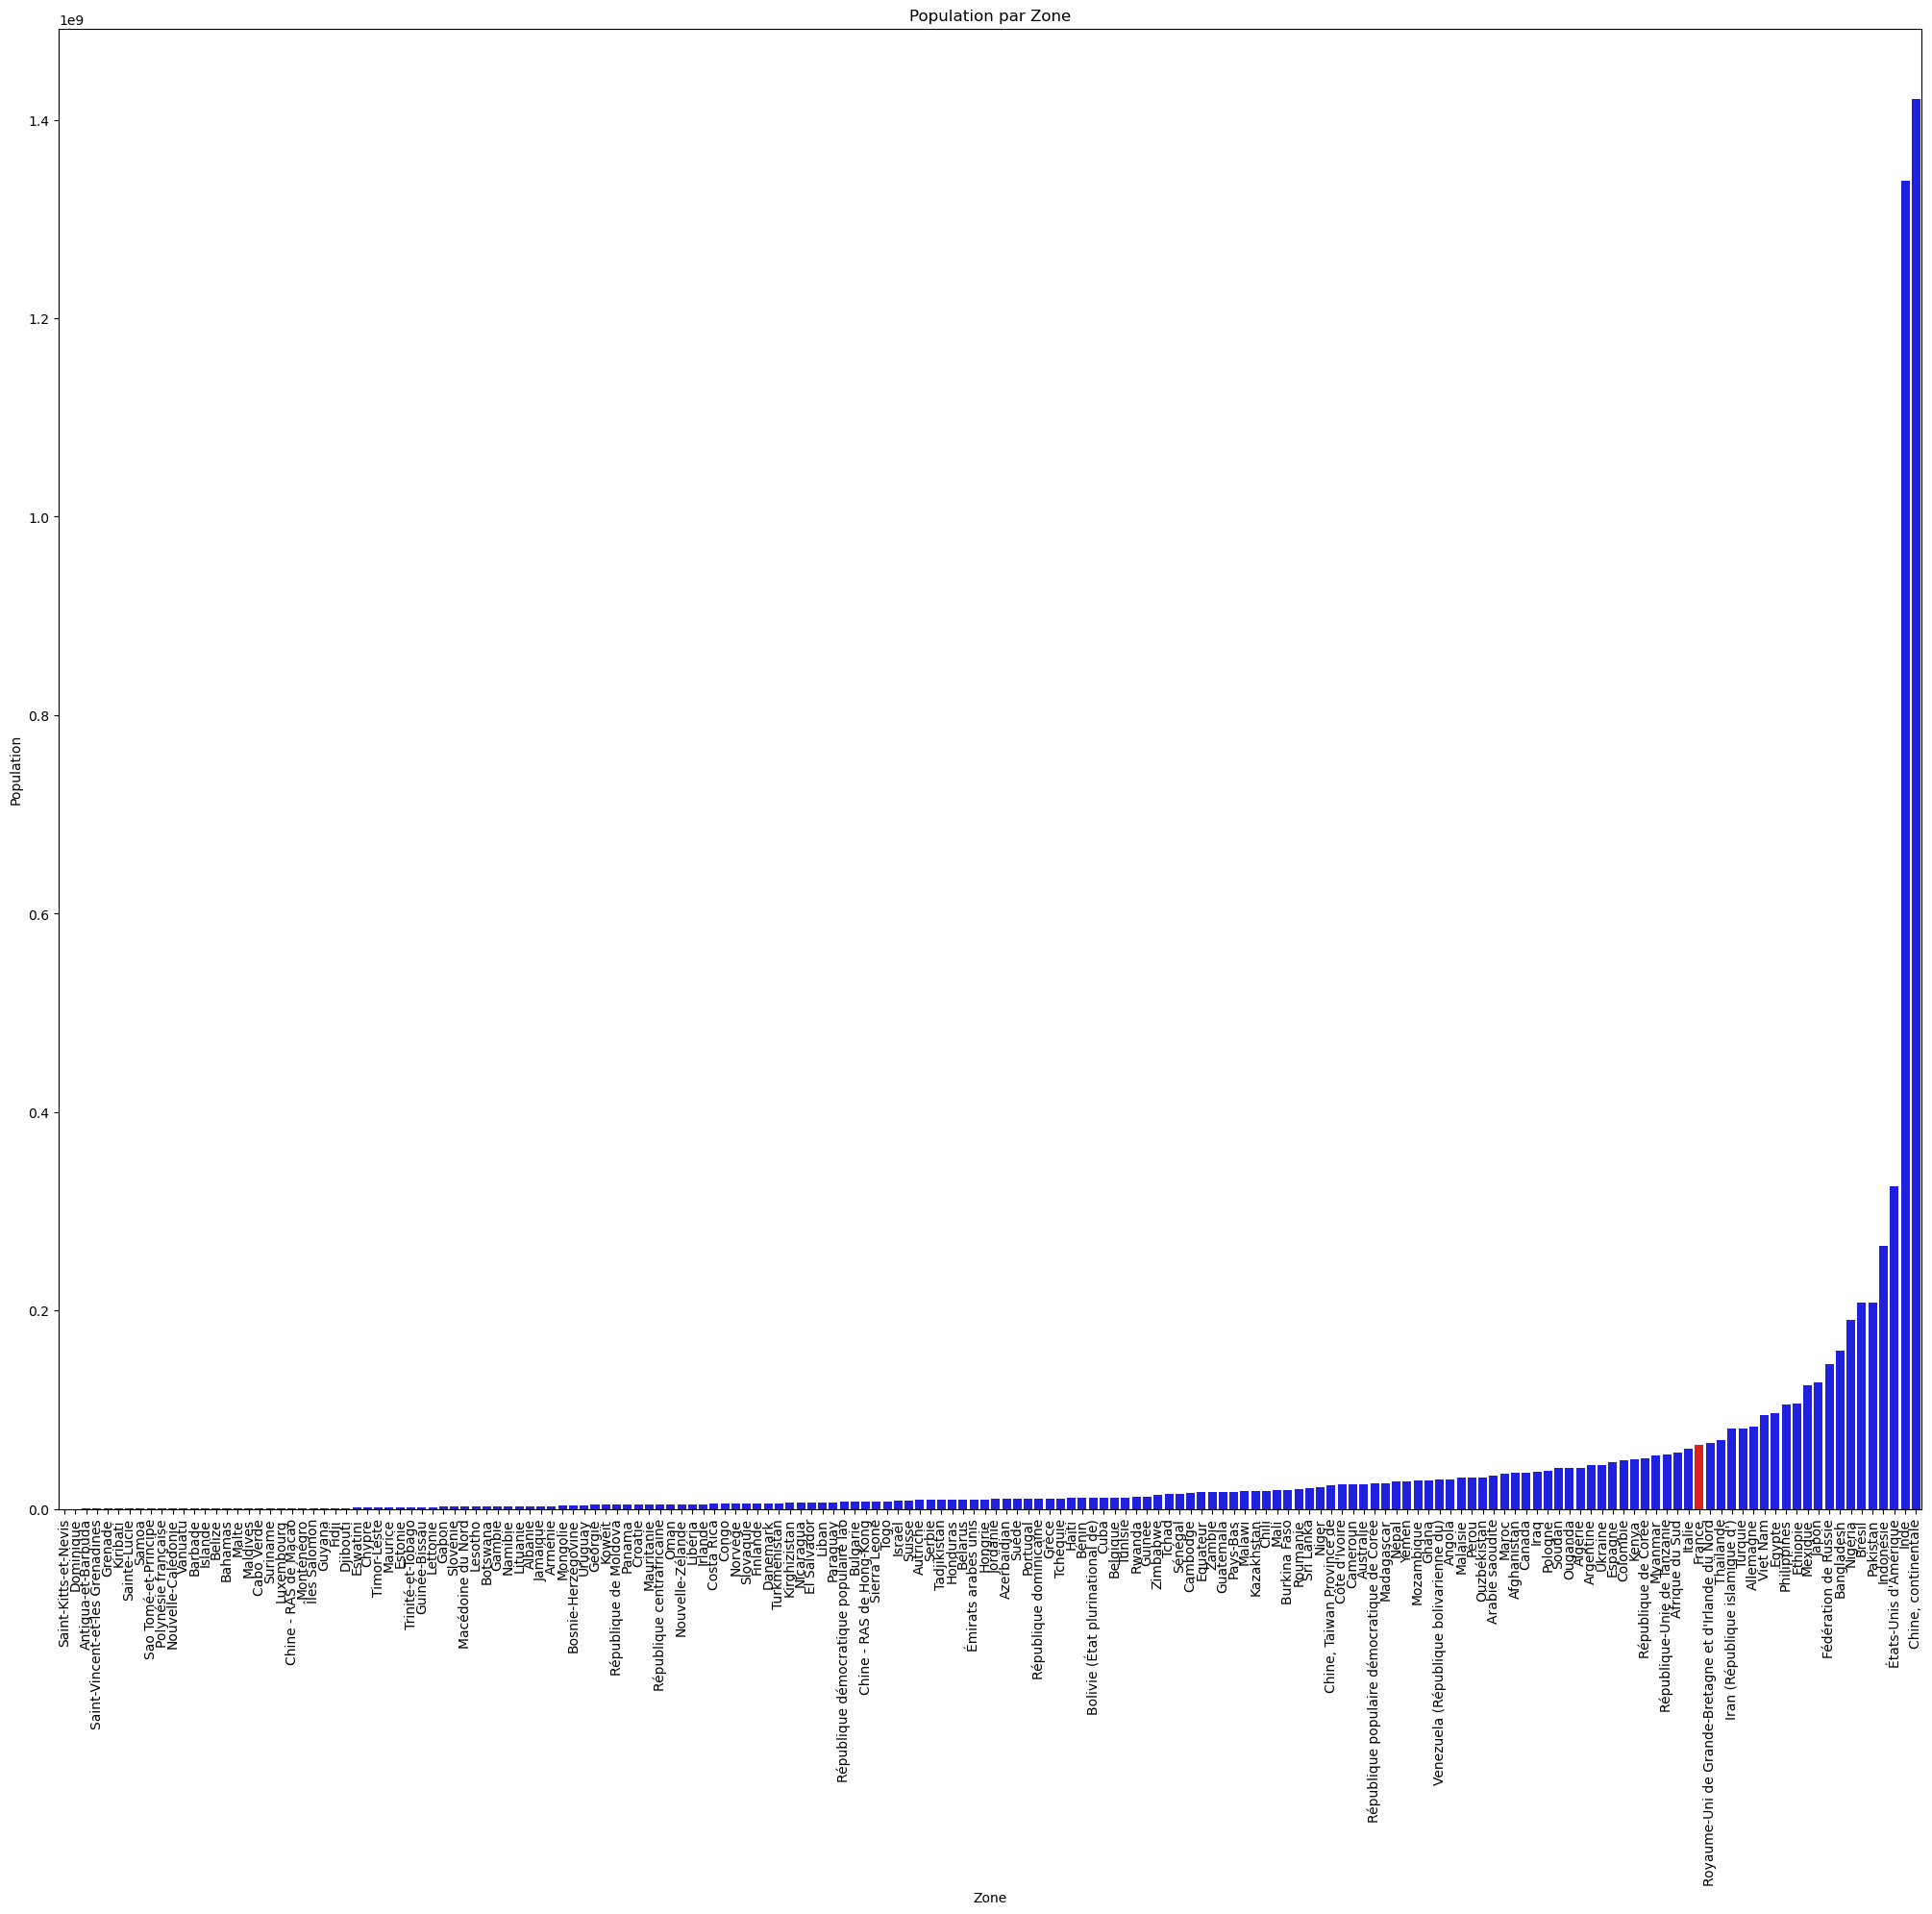

In [136]:
# graph population
# Trier les données par population de manière croissante
df_merged = df_merged.sort_values(by='Valeur_population', ascending=True)

plt.figure(figsize=(25, 20))
palette = ['red' if zone == 'France' else 'blue' for zone in df_merged['Zone']]  
sns.barplot(x='Zone', y='Valeur_population', data=df_merged, palette=palette)
plt.title('Population par Zone')
plt.xlabel('Zone')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.show()


C:\Users\SKIKK\AppData\Local\Temp\ipykernel_23364\1737181382.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Zone', y='Disponibilité intérieure_dispo', data=df_merged, palette=palette)


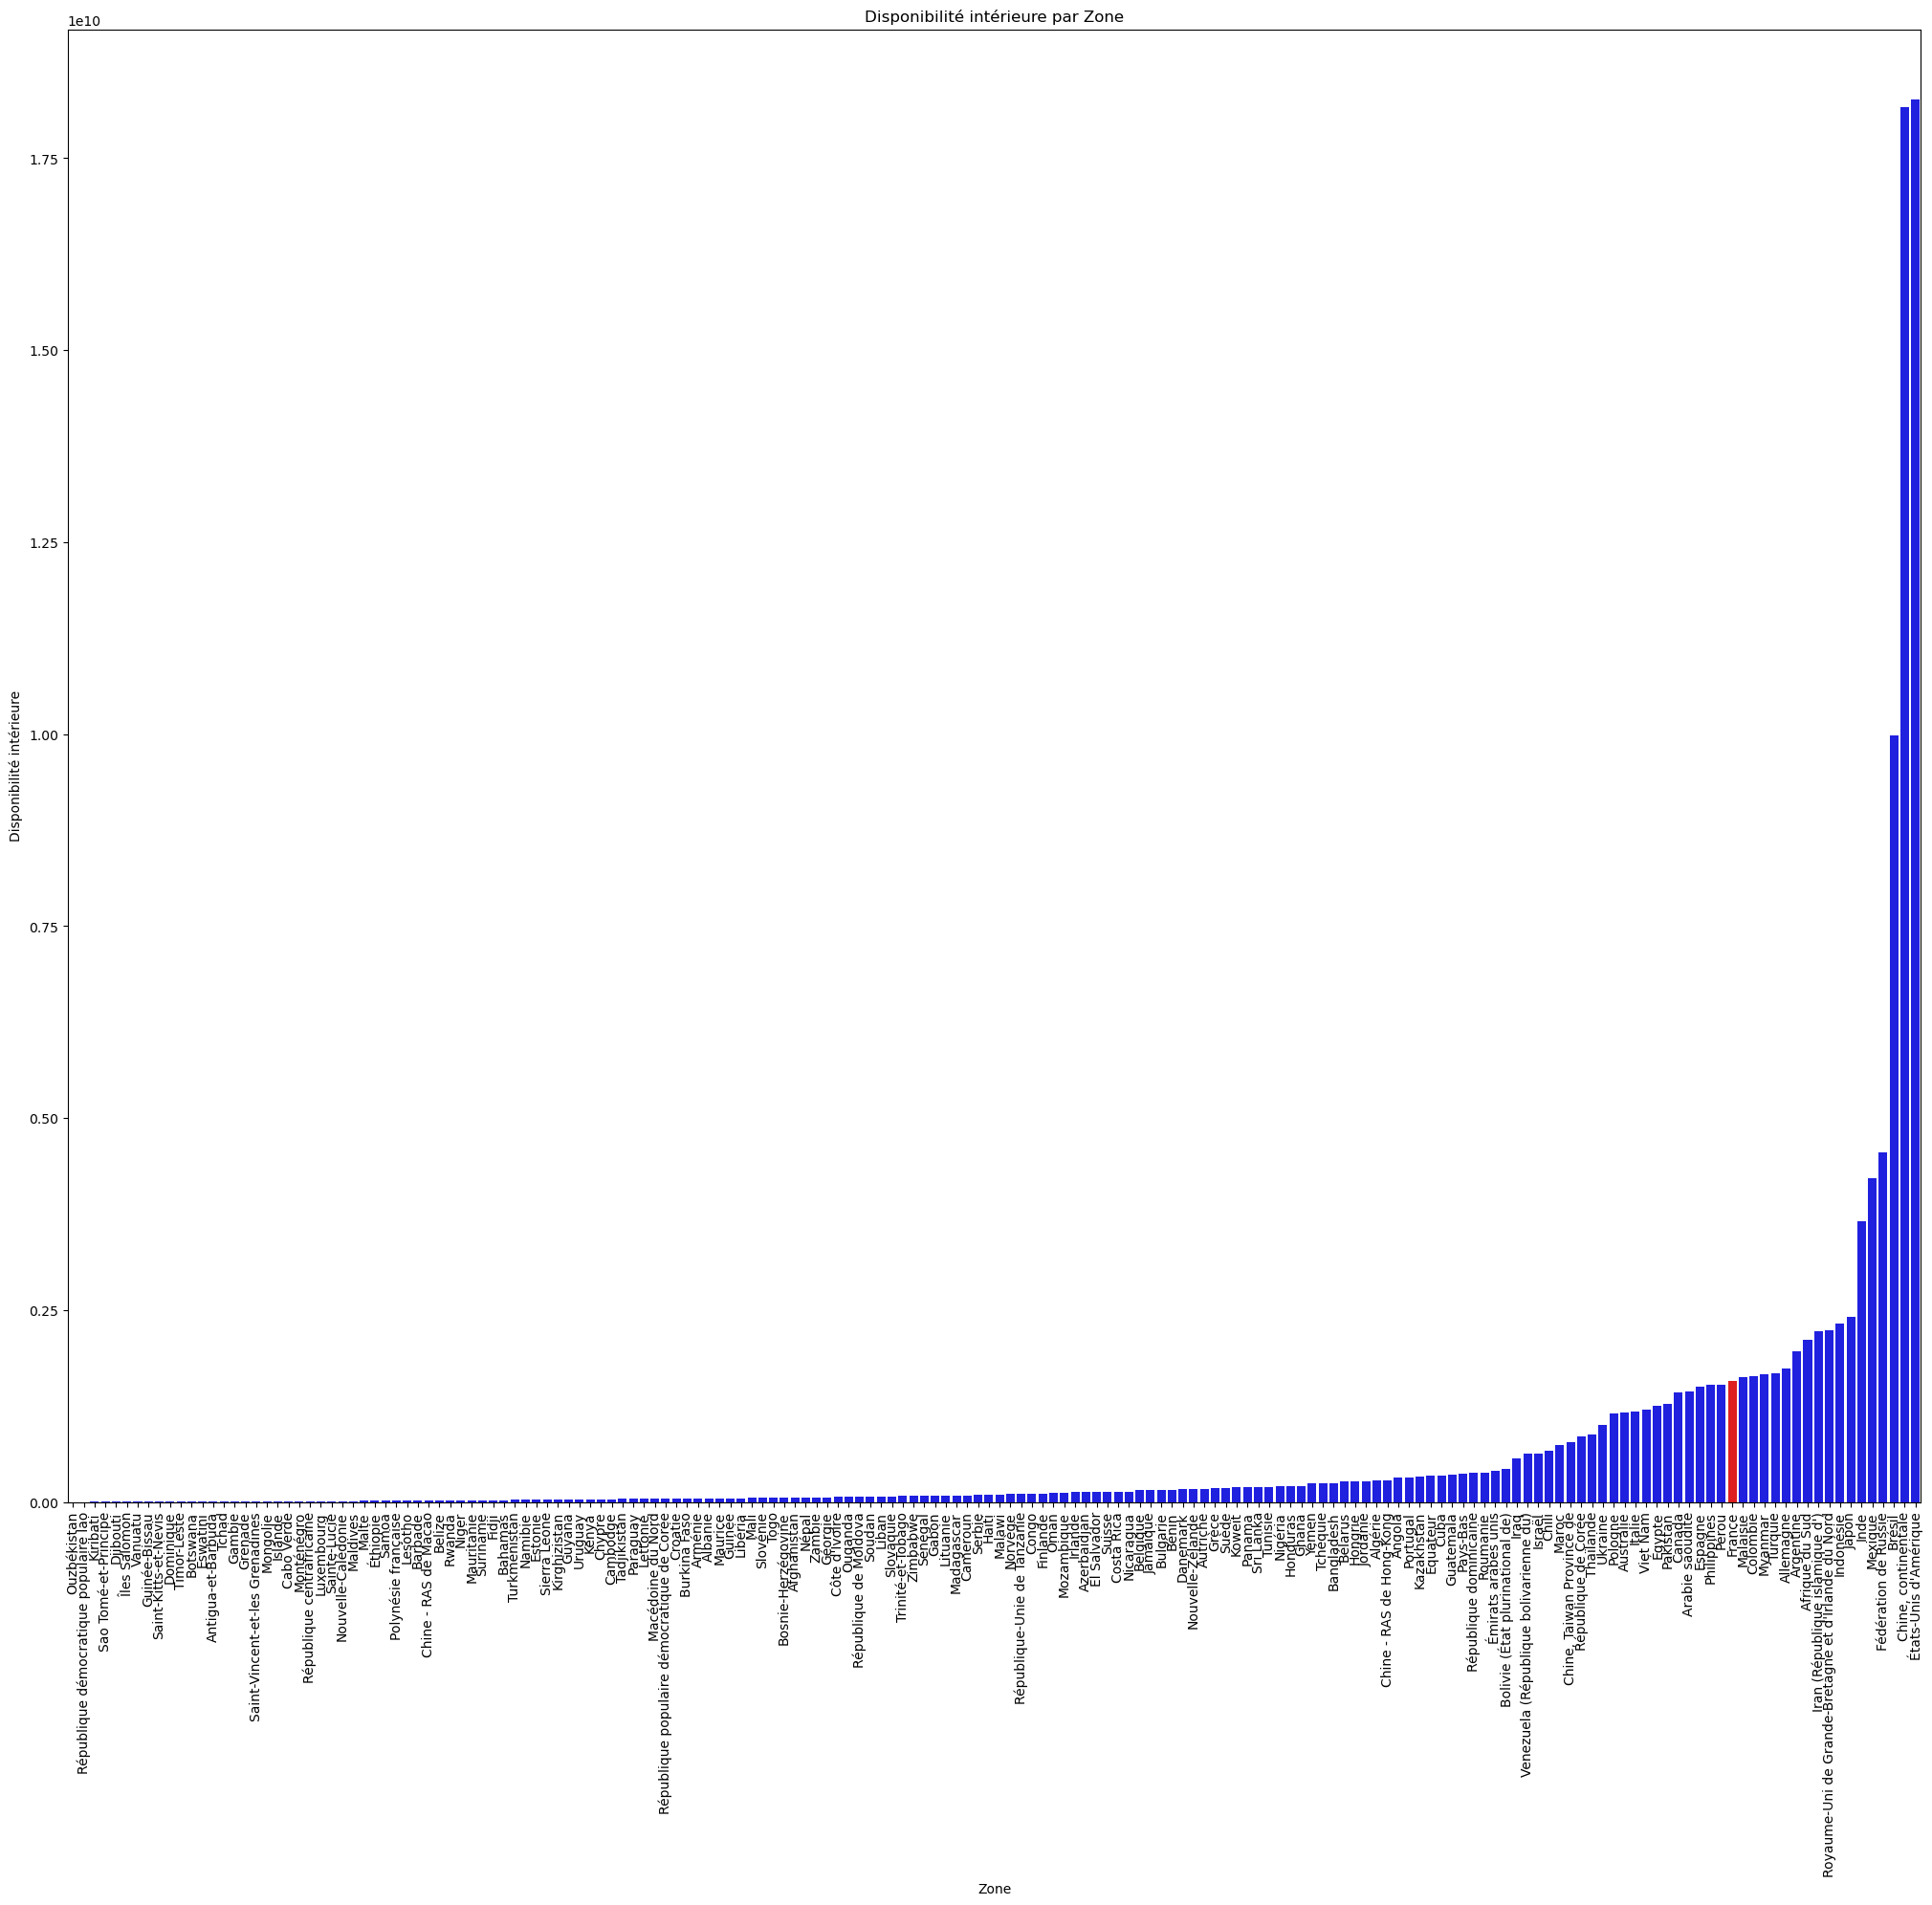

In [137]:
# trier les données de disponibilité intérieure par ordre croissant
df_merged = df_merged.sort_values(by='Disponibilité intérieure_dispo', ascending=True)
# graph disponibilite interieure
plt.figure(figsize=(25, 20))
palette = ['red' if zone == 'France' else 'blue' for zone in df_merged['Zone']]
sns.barplot(x='Zone', y='Disponibilité intérieure_dispo', data=df_merged, palette=palette)
plt.title('Disponibilité intérieure par Zone')
plt.xlabel('Zone')
plt.ylabel('Disponibilité intérieure')
plt.xticks(rotation=90)
plt.show()


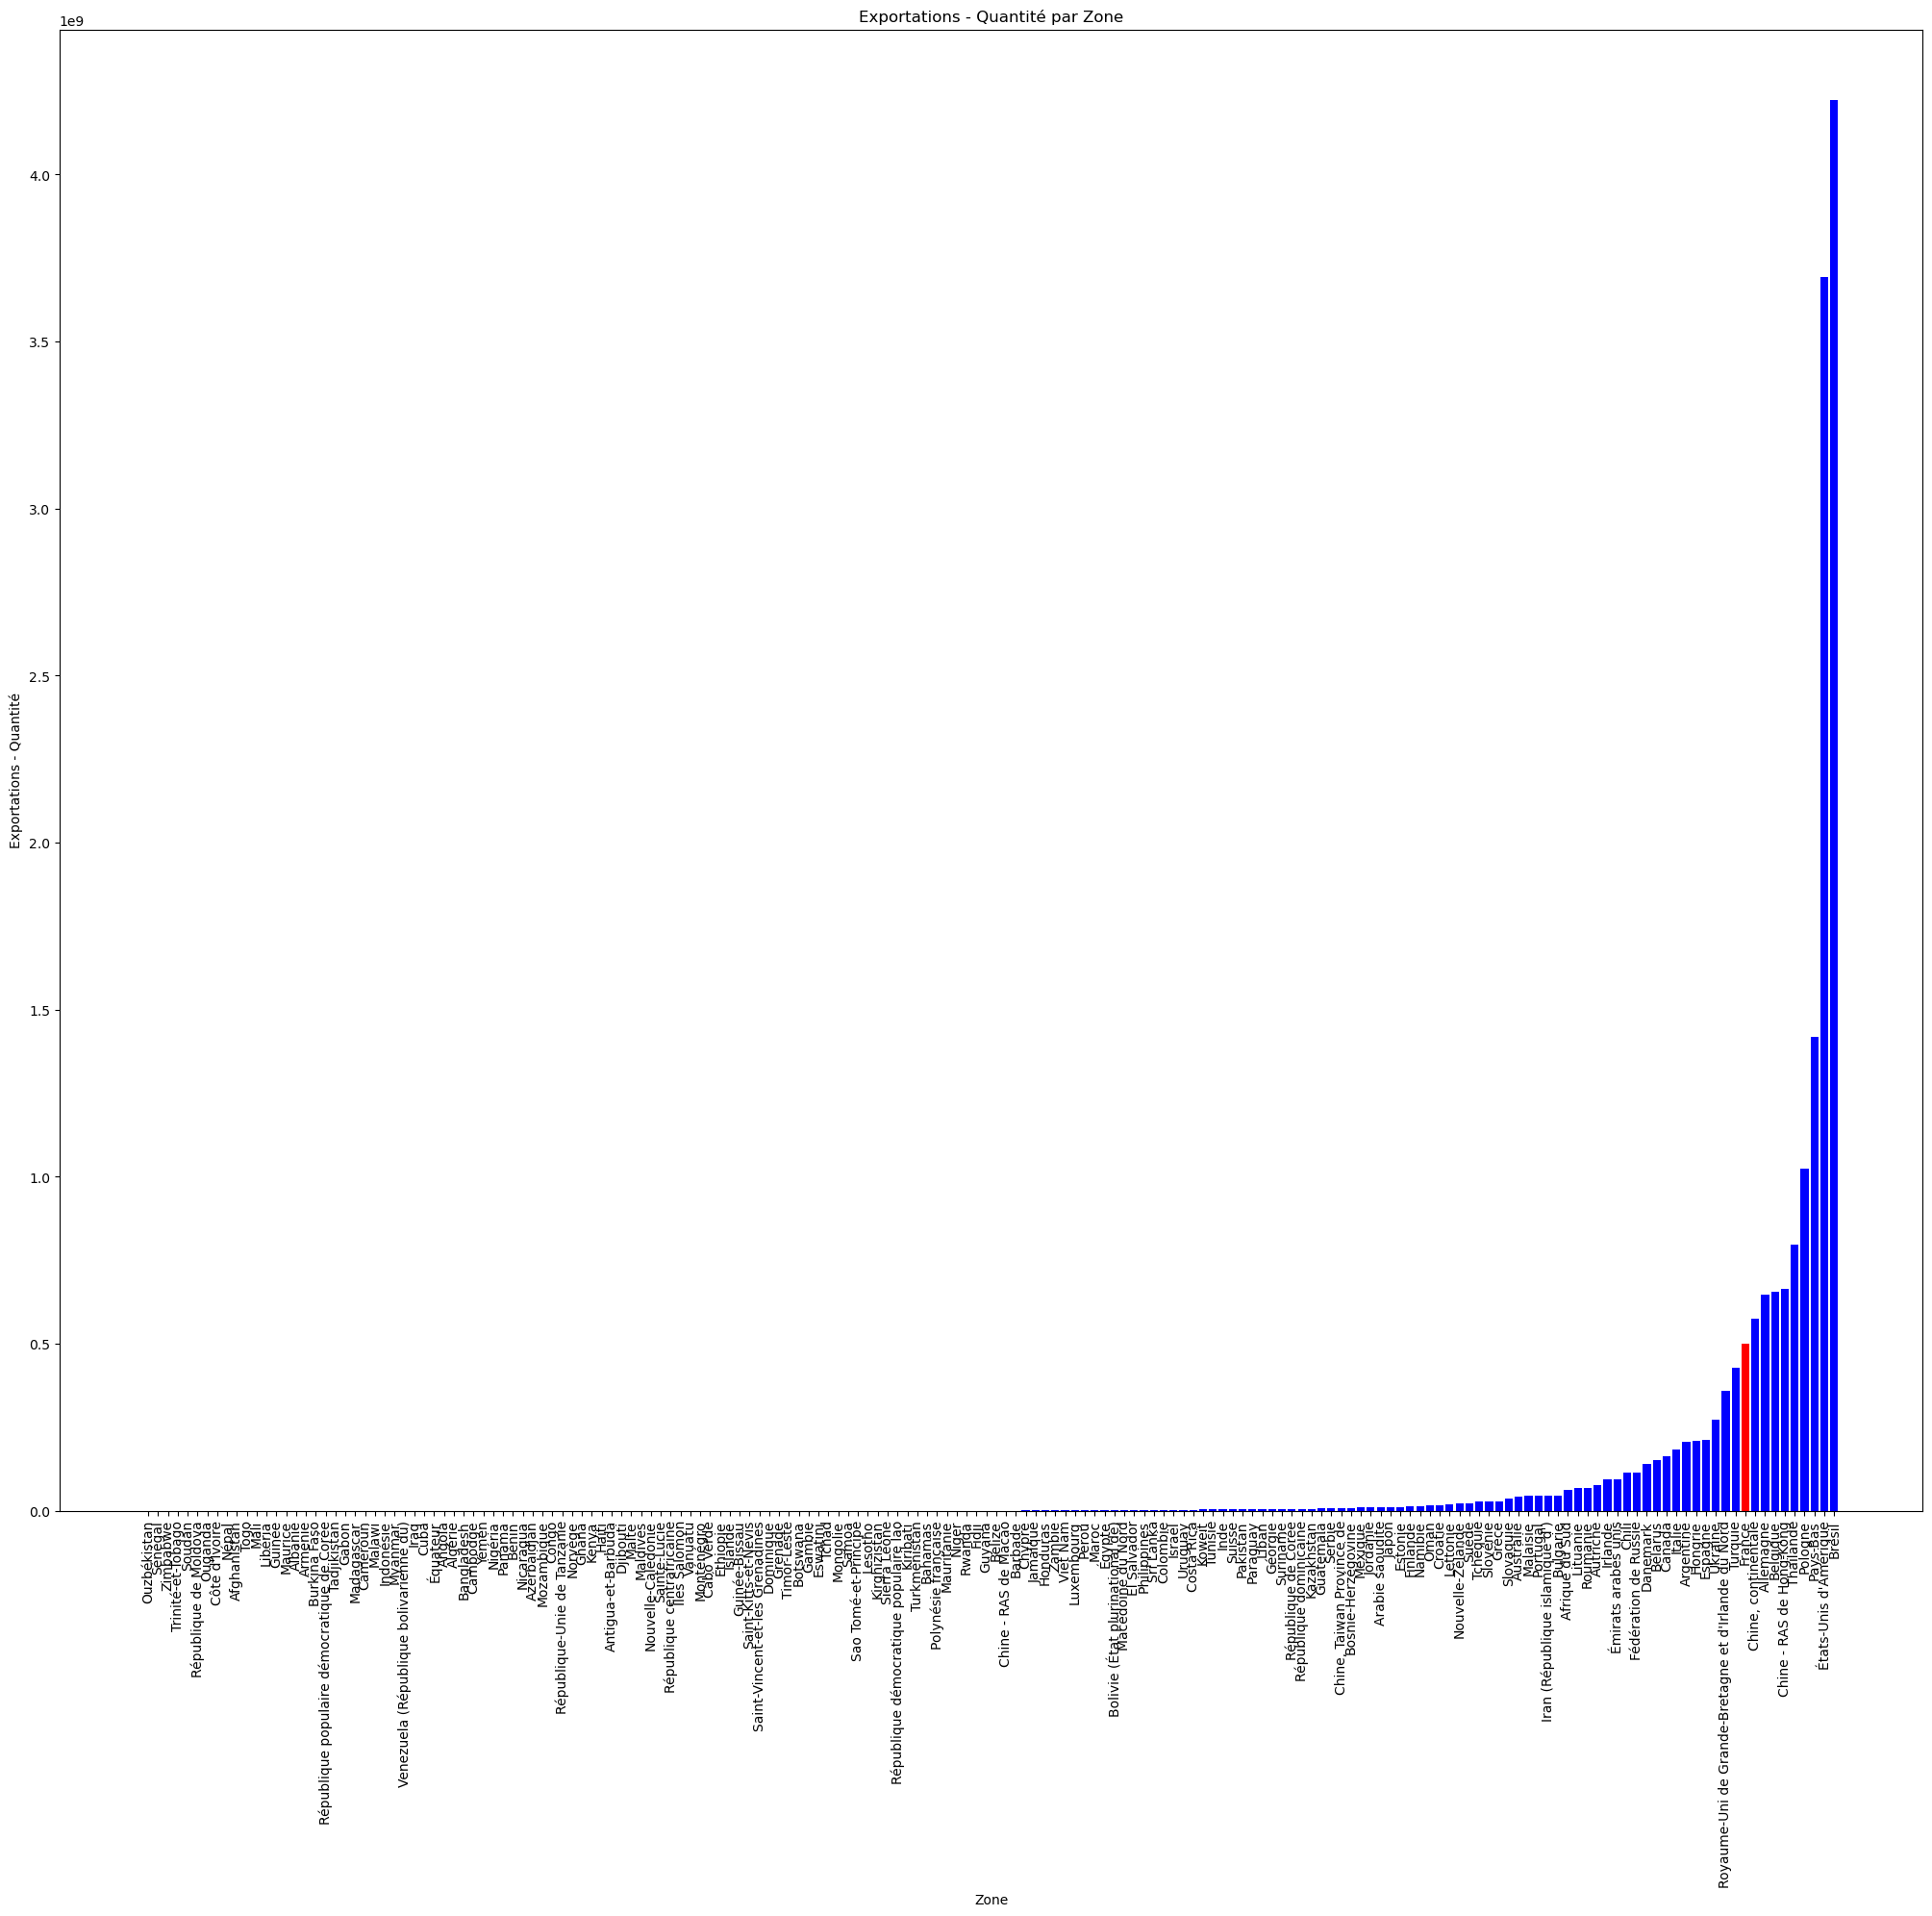

In [138]:
# trier les données par exportations
df_merged = df_merged.sort_values(by='Exportations - Quantité_dispo', ascending=True)
# graph Exportations - Quantité_dispo
plt.figure(figsize=(25, 20))
palette = ['red' if zone == 'France' else 'blue' for zone in df_merged['Zone']]
plt.bar(df_merged['Zone'], df_merged['Exportations - Quantité_dispo'], color=palette)
plt.title('Exportations - Quantité par Zone')
plt.xlabel('Zone')
plt.ylabel('Exportations - Quantité')
plt.xticks(rotation=90)
plt.show()


### export

In [148]:
# export to csv
df_merged.to_csv('merged_data.csv', index=False)
